# Data Cleaning

In [1]:
import sys, os
sys.path.append('../')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.cleaning import cleaning_pipeline
import warnings
warnings.filterwarnings("ignore")

# Data Ingestion

In [2]:
df = pd.read_csv("./Data/desafio_indicium_imdb.csv", sep=",")
print(f"Shape: {df.shape}")
df.head()

Shape: (999, 16)


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


# General Look at the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [4]:
df.isna().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,842.000000,9.990000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05
std,288.530761,0.272290,12.383257,3.209126e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.500000,7.700000,70.000000,5.547150e+04
50%,500.000000,7.900000,79.000000,1.383560e+05
75%,749.500000,8.100000,87.000000,3.731675e+05
max,999.000000,9.200000,100.000000,2.303232e+06


### Observations:
- The dataset contains missing values in four columns: `Certificate`, `Meta_Score`, `Gross`. Non of them have the same amount of NaN values
- There are no duplicated rows
- It contains a sort of Id column, although it's probably bad formatting of the file
- The `IMDB_Rating` column is the target
- `Runtime` should be a numerical column, but is a categorical one because of the "min" text at a first glance
- `Released_Year` and `Gross` are also being treated as categorical columns
- `Genre` is presented as a list of all genres the movie fits in
- `IMDB_Rating` and	`Meta_score` appear to have a distribution close to normal, with `No_of_Votes` being the numerical column with a potential high skew
### Impact:
- For a lower chance of a mistake in the future, all columns should be formatted in lowercase
- Missing data in the columns `Certificate`, `Meta_score` and `Gross` should be handled
- The "Id" column must be dropped since it has no value and it's probably bad formatting
- `Runtime`, `Released_Year` and `Gross` should be investigated and changed to numerical columns
- `Genre` values should be formatted into actual lists for an easier analysis later on
- All numerical columns, along with `Runtime` and `Gross` should be investigated to see any outlier behavior

# Categorical columns that should be Numerical ones

## Released_Year

In [7]:
df[~df["Released_Year"].str.isdigit()].shape

(1, 16)

In [8]:
df[~df["Released_Year"].str.isdigit()]

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


## Runtime

In [9]:
df[df["Runtime"].str.isdigit()].shape

(0, 16)

In [10]:
df["Runtime"].str.endswith(" min").all()

np.True_

In [11]:
df["Runtime"].str.split(" ", expand=True)[0].str.isdigit().shape

(999,)

## Gross

In [12]:
df[df["Gross"].notna()]["Gross"].astype(str).str.isdigit().shape


(830,)

### Observations:
- `Released_Year` has a single row where there's no year, but a type of certificate on its place
- `Runtime` has all values with the "min" after the number
- `Gross` do not have any rows without digits

### Impact:
- Since there's only one case of letters in the place of the year and the column `Released_Year` doesn't have NaN values, a quick search online can be made to replace the letters with the correct year
- `Runtime` has all values ending with "min", and if I remove this, all values are only numbers
- `Gross` has all values (excluding NaN) as digits, so the "," needs to be replaced with ""

# Missing Data

In [13]:
df["Certificate"].value_counts()

Certificate
U           234
A           196
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
Unrated       1
TV-MA         1
16            1
U/A           1
Name: count, dtype: int64

### Observations:
- `Certificate` has a "Unrated" category.

### Impact:
- All NaN values of `Certificate` can be replaced by "Unrated", since it's impossible to know the certificate of each movie, and the column also doesn't have any connection to the others
- `Meta_Score` and `Gross` can have their NaN values replaced by the median of each column, so the distribution of them is less disrupted, maintaining the integrity of the data distribution, but this will only be confirmed in the outlier study

# Outilers

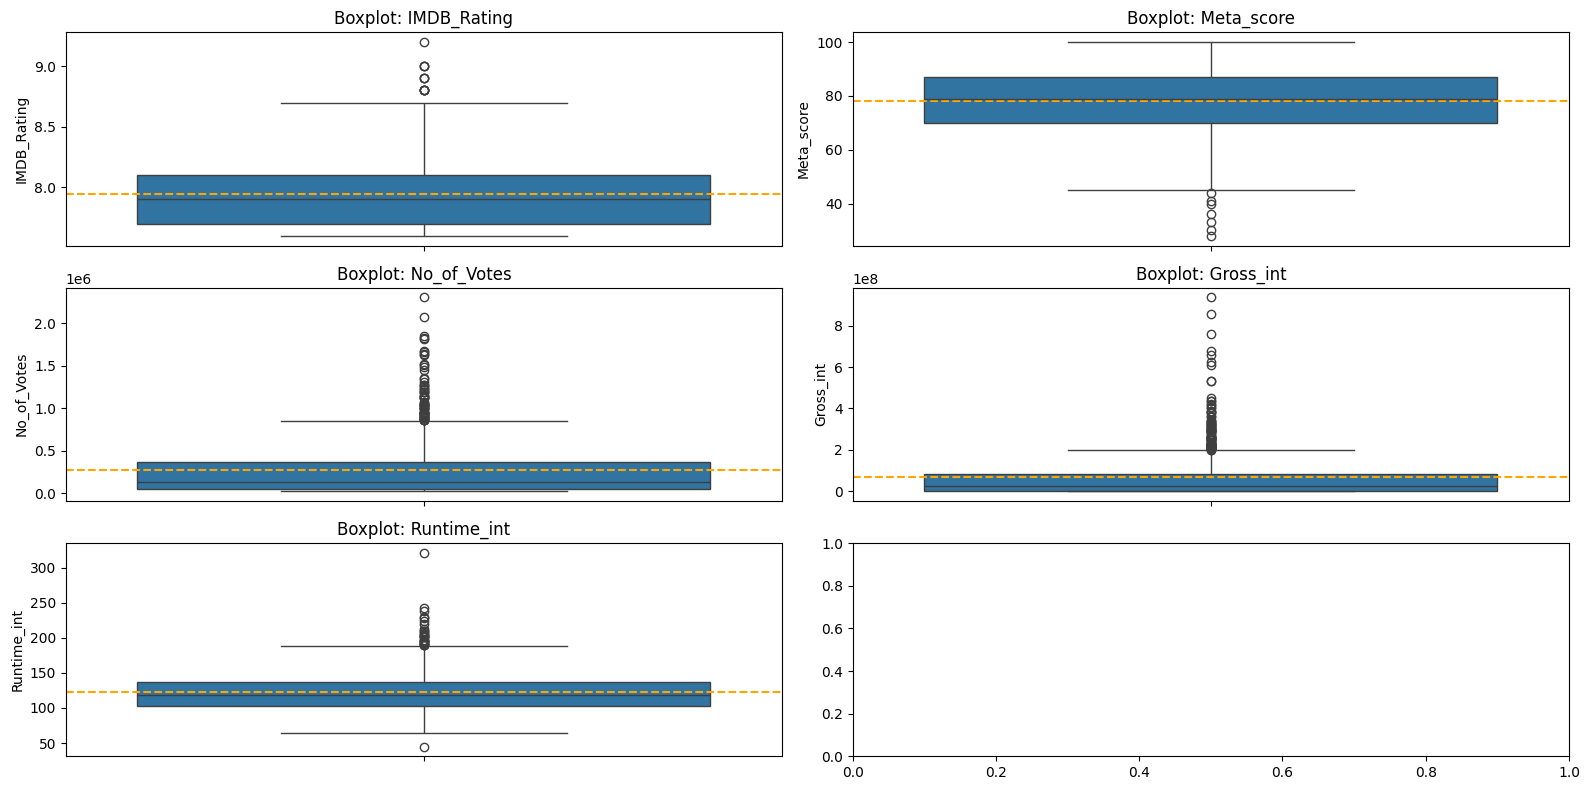

In [14]:
fig, ax = plt.subplots(3, 2, figsize=(16, 8))
ax = ax.ravel()
df["Gross_int"] = df[df["Gross"].notna()]["Gross"].astype(str).str.replace(",", "").astype(int)
df["Runtime_int"] = df["Runtime"].str.replace(" min", "").astype(int)
columns = ["IMDB_Rating", "Meta_score", "No_of_Votes", "Gross_int", "Runtime_int"]
for i, col in enumerate(df[columns]):
    sns.boxplot(y=df[col], ax=ax[i])
    ax[i].axhline(df[col].mean(), color="orange", linestyle="--")
    ax[i].set_title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

### Observations:
- The orange line represents the mean of each column
- `IMDB_Rating`, `Meta_Score` and `Runtime` are the columns with the distribution being the closest to a normal one, with a few outliers
- `No_of_Votes` and `Gross` are far from a normal distribution and also have a high number of outliers

### Impact:
- `No_of_Votes` and `Gross` will probably need to go through a statistical transformation to try and fix the high skewness of them and the high number of outliers
- The NaN values of `Meta_score` and `Gross` will be replaced by the median

# Data Cleaning Pipeline

### Based on the analysis in this notebook, the following data cleaning steps will be taken:
- Remove the "id" column
- Format all column names in lowercase
- Format the values of `Genre` into lists
- Transform `Released_Year`, `Runtime` and `Gross` into numerical columns
- Fill all NaN values of `Certificate` with "Unrated" and the Nan values of `Meta_score` and `Gross` with the median of each column

In [21]:
df = pd.read_csv("./Data/desafio_indicium_imdb.csv")
cleaning_pipeline(df, "Data", "clean_desafio_indicium_imdb")